In [1]:
!pip install --upgrade --quiet google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 8.0 MB/s eta 0:00:00


In [2]:
from io import BytesIO
from PIL import Image
from google.cloud import storage
from google import genai
from google.genai import types

storage_client = storage.Client()

PROJECT_ID = "qwiklabs-gcp-02-0d9205e9c2b3"
BUCKET_NAME = f"{PROJECT_ID}-bucket"
NANO_BANANA = "gemini-2.5-flash-image-preview"

client = genai.Client(
    vertexai=True,
    project=PROJECT_ID,
    location="global",
)

In [3]:
client

In [4]:
def display_image(image_data):
    """Displays an image in a Colab notebook from PNG data."""
    img = Image.open(BytesIO(image_data))
    img.save('my_image.png')
    display(img)

def display_img_from_gcs(bucket_name, img_path):
    """Downloads bytes and displays an image stored in GCS."""
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.get_blob(img_path)
    display_image(blob.download_as_bytes())

# Task 3. Query Nano Banana from your notebook


In [5]:
display_img_from_gcs(BUCKET_NAME, "product_jacket_932.png")

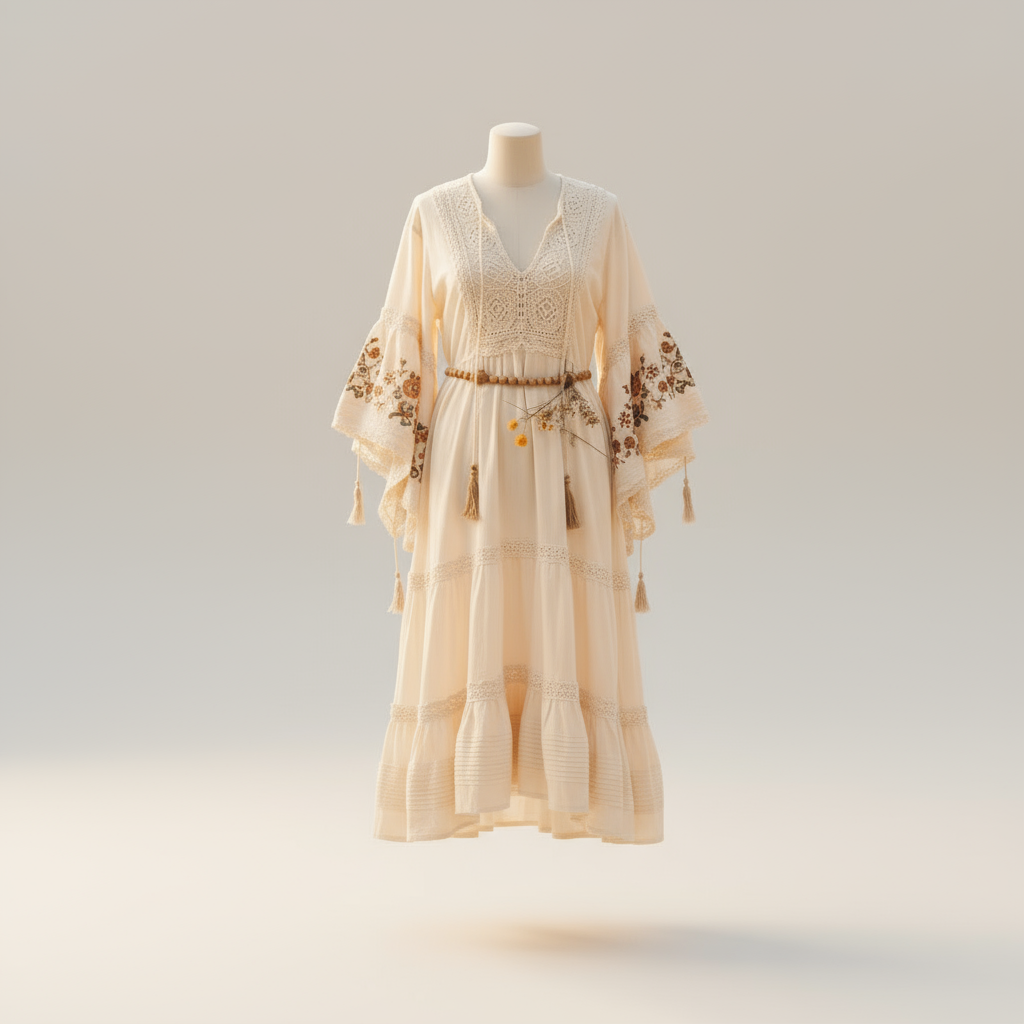

In [6]:
display_img_from_gcs(BUCKET_NAME, "product_dress_128.png")

In [11]:
# input images from Google Cloud Storage
image1 = types.Part.from_uri(
    file_uri=f"gs://{BUCKET_NAME}/product_dress_128.png",
    mime_type="image/png",
)

image2 = types.Part.from_uri(
    file_uri=f"gs://{BUCKET_NAME}/product_jacket_932.png",
    mime_type="image/png",
)


prompt = types.Part.from_text(
    text=("Create a photo featuring a young couple"
          "from Indonesia wearing these clothing"
          "products on a walk at a beach in Surabaya.")
)


# input the 2 images AND text prompt
content = [
    types.Content(
        role="user",
        parts=[image1, image2, prompt]
    )
]

In [12]:
content

[Content(
   parts=[
     Part(
       file_data=FileData(
         file_uri='gs://qwiklabs-gcp-02-0d9205e9c2b3-bucket/product_dress_128.png',
         mime_type='image/png'
       )
     ),
     Part(
       file_data=FileData(
         file_uri='gs://qwiklabs-gcp-02-0d9205e9c2b3-bucket/product_jacket_932.png',
         mime_type='image/png'
       )
     ),
     Part(
       text='Create a photo featuring a young couplefrom Indonesia wearing these clothingproducts on a walk at a beach in Surabaya.'
     ),
   ],
   role='user'
 )]

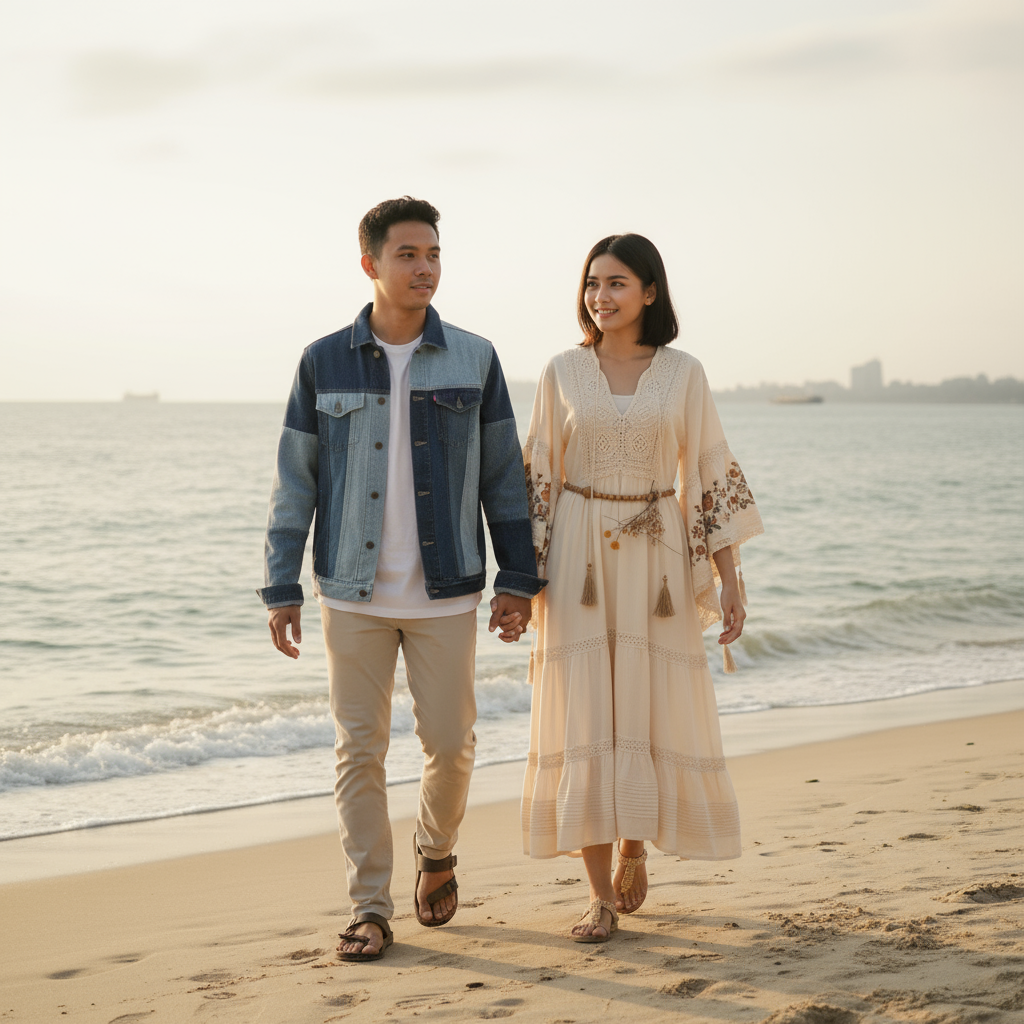

In [13]:
#  specify that you expect a response including text and images
gen_config = types.GenerateContentConfig(
    response_modalities = ["TEXT", "IMAGE"]
)

response = client.models.generate_content(
    model = NANO_BANANA,
    contents = content,
    config = gen_config,
    )

for part in response.candidates[0].content.parts:
    if part.inline_data:
        image_data = part.inline_data.data
        display_image(image_data)

In [14]:
response

GenerateContentResponse(
  automatic_function_calling_history=[],
  candidates=[
    Candidate(
      content=Content(
        parts=[
          Part(
            inline_data=Blob(
              data=<... Max depth ...>,
              mime_type=<... Max depth ...>
            )
          ),
        ],
        role='model'
      ),
      finish_reason=<FinishReason.STOP: 'STOP'>
    ),
  ],
  create_time=datetime.datetime(2025, 10, 15, 3, 55, 34, 701785, tzinfo=TzInfo(UTC)),
  model_version='gemini-2.5-flash-image-preview',
  response_id='NhvvaNnqKsag48APtaPDyAo',
  sdk_http_response=HttpResponse(
    headers=<dict len=9>
  ),
  usage_metadata=GenerateContentResponseUsageMetadata(
    candidates_token_count=1290,
    candidates_tokens_details=[
      ModalityTokenCount(
        modality=<MediaModality.IMAGE: 'IMAGE'>,
        token_count=1290
      ),
    ],
    prompt_token_count=538,
    prompt_tokens_details=[
      ModalityTokenCount(
        modality=<MediaModality.TEXT: 'TEXT'>,
 

In [16]:
len(response.candidates)

1

In [17]:
len(response.candidates[0].content.parts)

1

In [18]:
response.candidates[0].content.parts[0].inline_data.mime_type

'image/png'

# Task 4. Use Nano Banana to generate images that include text


## Edit a UI with Nano Banana

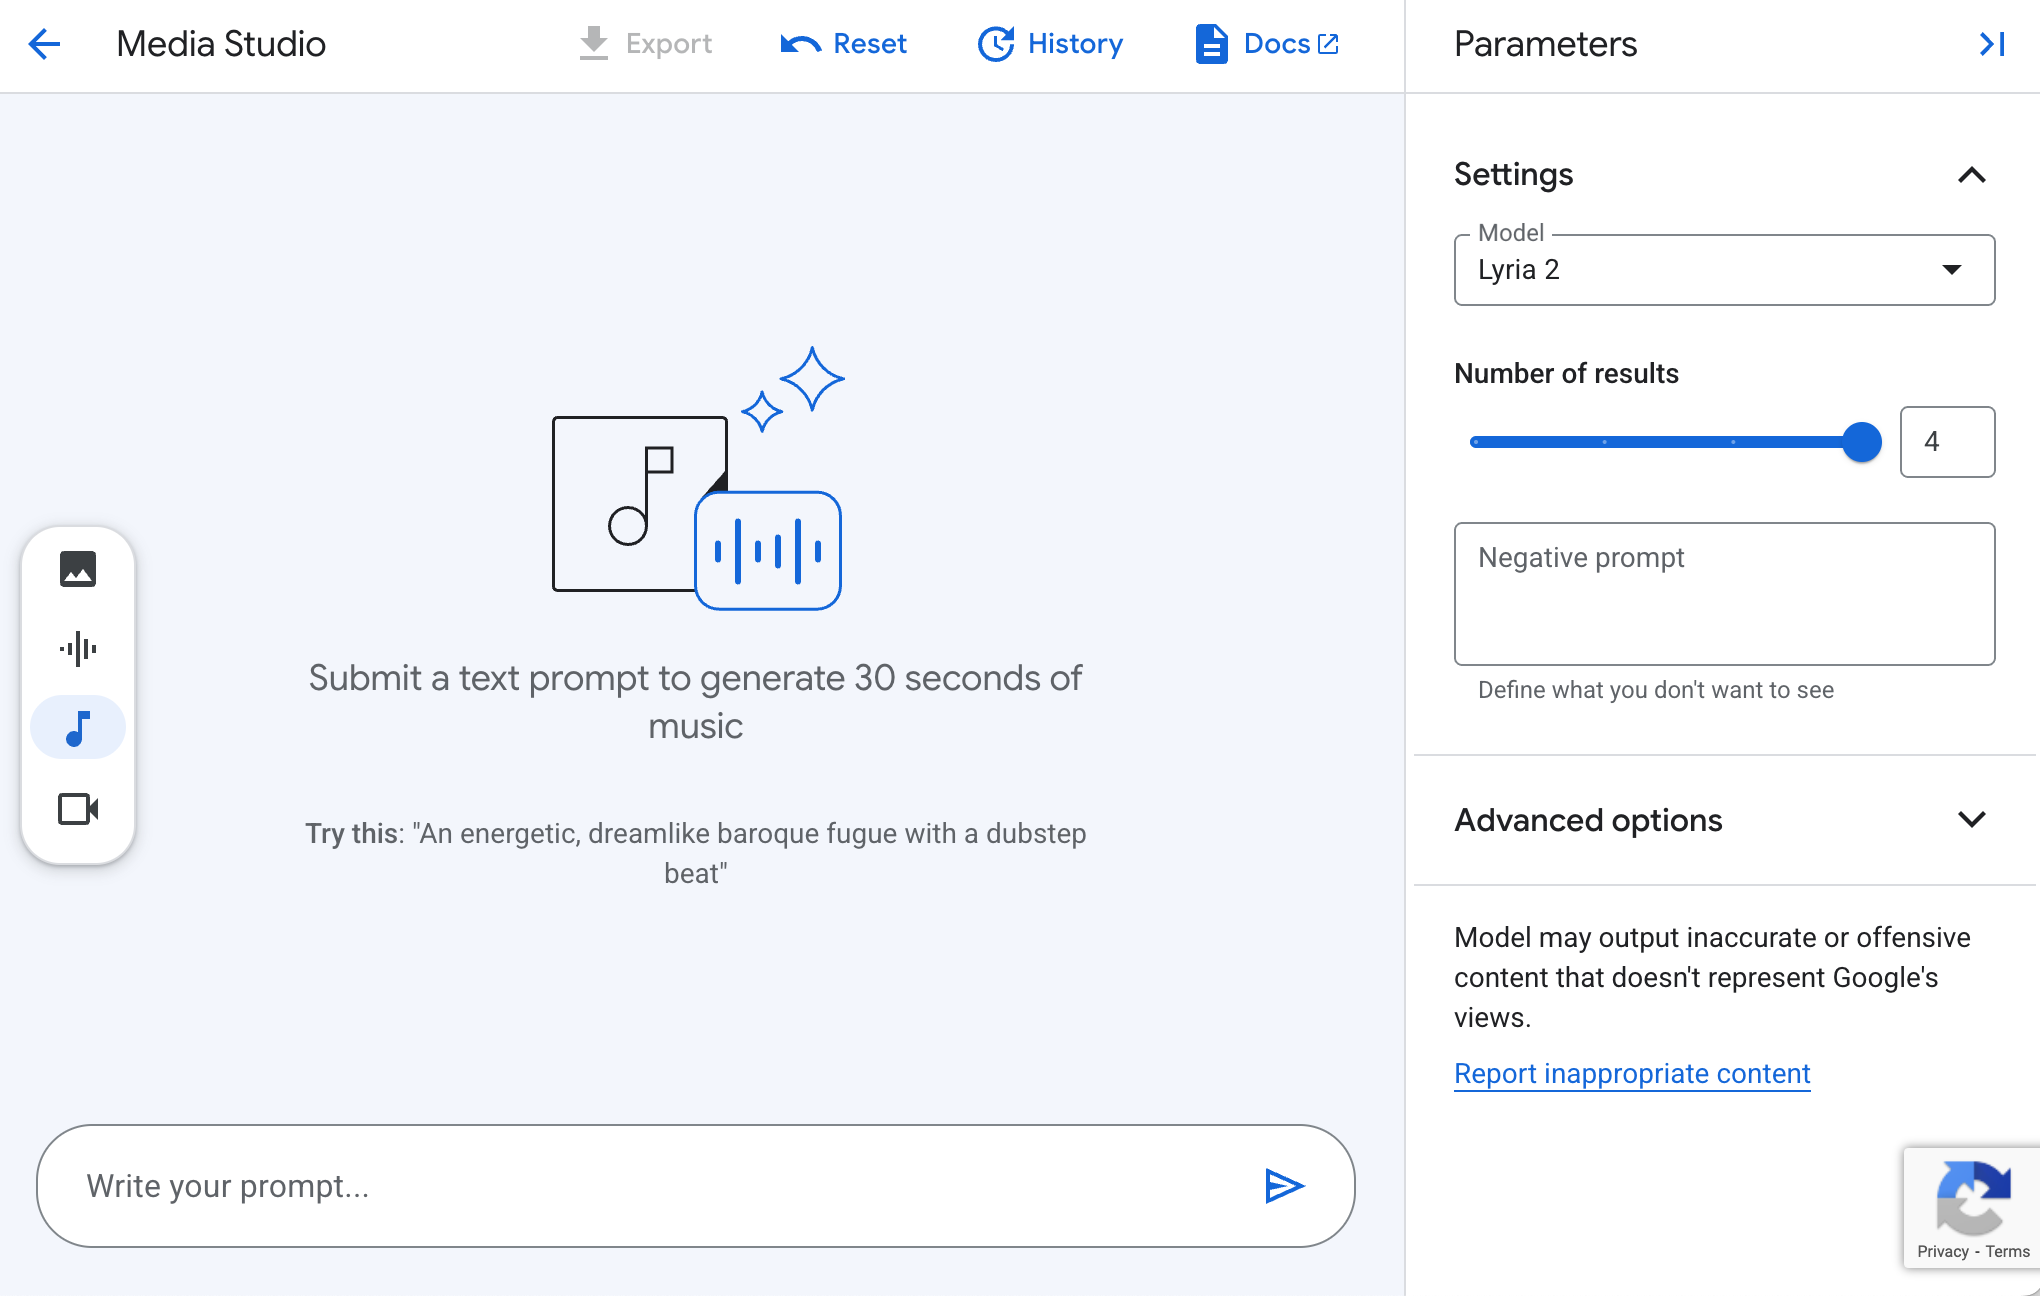

In [15]:
# This UI comes from the Google Cloud console -- specifically the Vertex AI Studio's Media Studio UI for music generation with the Lyria model.

display_img_from_gcs(BUCKET_NAME, "lyria_ui.png")

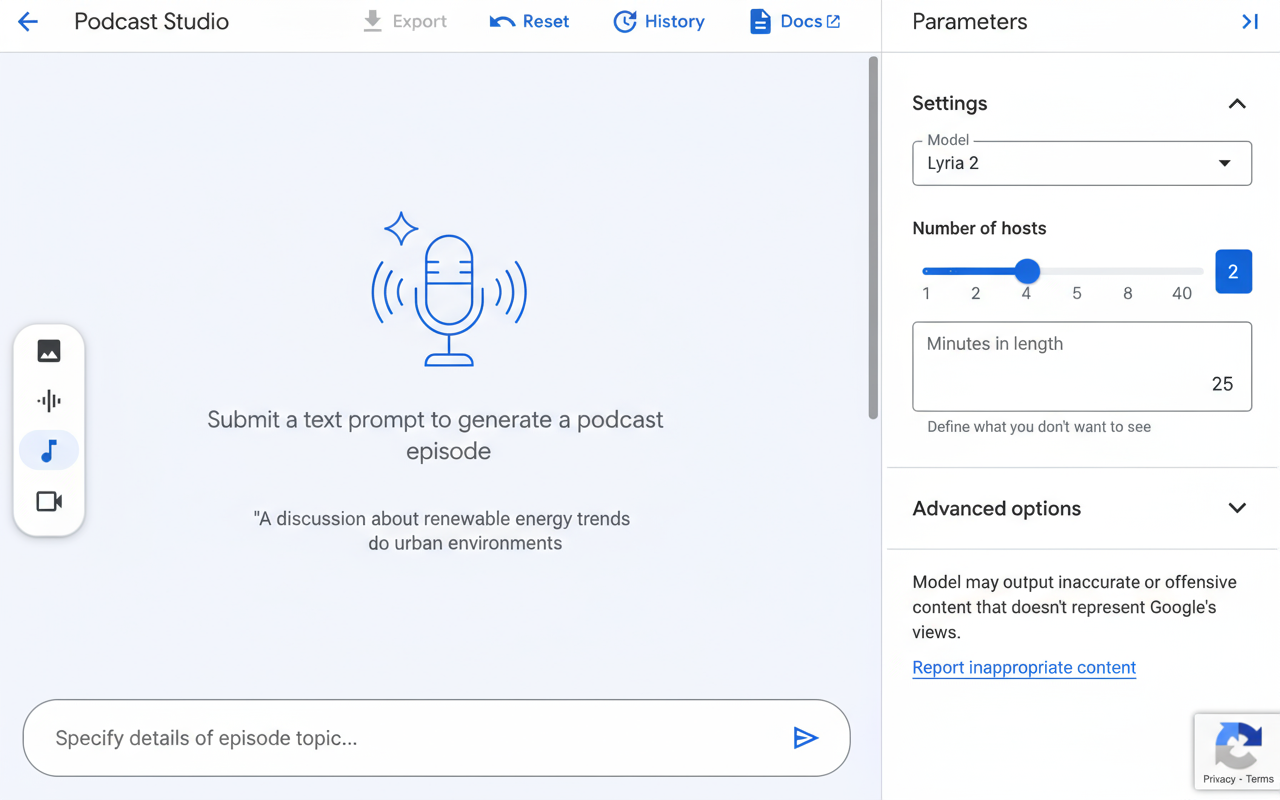

In [19]:
# step 4
#############################
# IMAGE AND TEXT PROMPT
#############################
ui_img_part = types.Part.from_uri(
    file_uri=f"gs://{BUCKET_NAME}/lyria_ui.png",
    mime_type="image/png",
)

text1 = types.Part.from_text(
    text="""
    Create a UI in the same style.
    It should be called Podcast Studio.
    Include configuration options:
    - A UI slider to set the number of hosts
      (from 1 to max 4)
    - A UI slider to set the minutes in length
      (from 2 to max 40)
    The prompt input box should tell the user to
    specify details of the episode topic.
    """
)

contents = [
    types.Content(
        role="user",
        parts=[ui_img_part, text1]
    )
]
#############################


response = client.models.generate_content(
    model = NANO_BANANA,
    contents = contents,
    config = gen_config, # OUTPUT TEXT/IMG/BOTH
    )

for part in B.candidates[0].content.parts:
    if part.inline_data:
        image_data = part.inline_data.data

        # display_image saves the image to 'my_image.png' in the colab's workspace!
        display_image(image_data)

In [20]:
response

GenerateContentResponse(
  automatic_function_calling_history=[],
  candidates=[
    Candidate(
      content=Content(
        parts=[
          Part(
            inline_data=Blob(
              data=<... Max depth ...>,
              mime_type=<... Max depth ...>
            )
          ),
        ],
        role='model'
      ),
      finish_reason=<FinishReason.STOP: 'STOP'>
    ),
  ],
  create_time=datetime.datetime(2025, 10, 15, 3, 59, 27, 400249, tzinfo=TzInfo(UTC)),
  model_version='gemini-2.5-flash-image-preview',
  response_id='HxzvaPm2GJmDpfgPyoK-2AU',
  sdk_http_response=HttpResponse(
    headers=<dict len=9>
  ),
  usage_metadata=GenerateContentResponseUsageMetadata(
    candidates_token_count=1290,
    candidates_tokens_details=[
      ModalityTokenCount(
        modality=<MediaModality.IMAGE: 'IMAGE'>,
        token_count=1290
      ),
    ],
    prompt_token_count=1900,
    prompt_tokens_details=[
      ModalityTokenCount(
        modality=<MediaModality.TEXT: 'TEXT'>,


In [21]:
response.candidates[0].content.parts[0].inline_data.mime_type

'image/png'

In [23]:
# step 5

# here, we the 'edited UI image' to the google cloud storage bucket as 'original_ui.png'
#       from 'my_image.png' previously saved above inside the colab workspace
bucket = storage_client.get_bucket(BUCKET_NAME)
blob = bucket.blob("original_ui.png")
blob.upload_from_filename("my_image.png")


In [24]:
original_ui_img_part = types.Part.from_uri(
    file_uri=f"gs://{BUCKET_NAME}/original_ui.png",
    mime_type="image/png",
)
text = types.Part.from_text(
    text="""
        Modify this image to remove the
        "Advanced Options" area. Keep current
        configuration options (Number of hosts
        and Minutes in Length) and add a new
        dropdown for Podcast Language.
    """
)

contents = [
    types.Content(
        role="user",
        parts=[original_ui_img_part, text]
    )
]

response = client.models.generate_content(
    model = NANO_BANANA,
    contents = contents,
    config = gen_config,
    )

for part in response.candidates[0].content.parts:
    if part.inline_data:
        image_data = part.inline_data.data
        display_image(image_data)